In [1]:
#pip install opencv-python
import cv2

In [2]:
#pip install matplotlib
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [138]:
classLabels = []  #empty list in python
file_name = 'coco.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt, read())

In [139]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'dog', 'cat', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [140]:
print(len(classLabels))

80


In [141]:
model.setInputSize(320, 320)
model.setInputScale(1.8/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 00000202E20C2DD0>

In [142]:
#read an image
img = cv2.imread('Re0cb978b4f31cb68e18b88b919730e48.jpg')

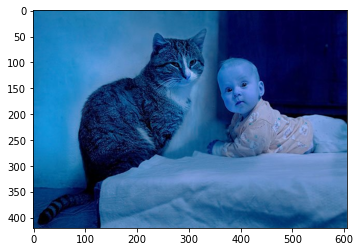

In [143]:
plt.imshow(img)

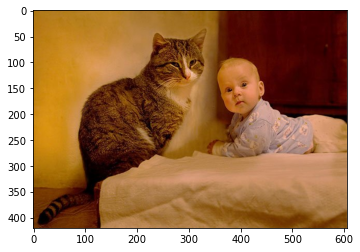

In [144]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [145]:
classIndex , confidece , bbox = model.detect(img, confThreshold = 0.7)

In [146]:
print(classIndex)

[[ 1]
 [17]]


In [147]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 1)
    cv2.putText(img, classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, (0,255,0), 1, cv2.LINE_AA)

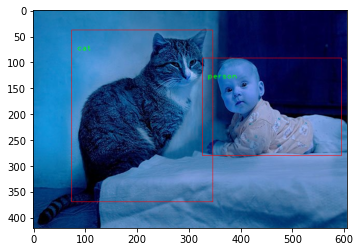

In [148]:
plt.imshow(img)

In [149]:
cap = cv2.VideoCapture('WhatsApp Video 2021-02-20 at 00.14.27.mp4')
if not (cap.isOpened()):
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("reload your video")
    
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN

while(True):
    ret, frame = cap.read()
    
    classIndex , confidece , bbox = model.detect(frame, confThreshold = 0.2)
    print(classIndex)
    if (len(classIndex) != 0):
        for classInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
            if(classInd <= 80):
                cv2.rectangle(frame, boxes, (255,0,0), 3)
                cv2.putText(frame, classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, font_scale, (0,255,0), 1, cv2.LINE_AA)
        

    cv2.imshow('Image', frame)

    if(cv2.waitKey(2) & 0xFF == ord('q')):
        break

cap.release()
cv2.destroyAllWindows()


[[ 1]
 [72]
 [ 1]
 [14]
 [ 7]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [85]
 [ 1]]
[[ 1]
 [72]
 [ 1]
 [14]
 [ 7]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [85]]
[[ 1]
 [72]
 [ 1]
 [ 1]
 [14]
 [ 1]
 [ 1]
 [35]
 [85]
 [ 7]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [72]
 [ 1]
 [ 1]
 [85]
 [ 1]
 [ 7]
 [35]]
[[ 1]
 [72]
 [35]
 [ 1]
 [85]
 [ 7]
 [11]]
[[ 1]
 [72]
 [35]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [72]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [85]
 [ 1]
 [ 1]
 [35]
 [ 1]
 [11]]
[[72]
 [ 1]
 [ 1]
 [ 7]
 [35]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [85]
 [ 1]
 [14]
 [ 1]
 [ 1]]
[[ 1]
 [72]
 [ 1]
 [ 1]
 [ 7]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [14]
 [ 1]
 [35]
 [85]
 [14]
 [ 1]
 [ 1]
 [77]]
[[72]
 [ 1]
 [ 7]
 [35]
 [14]
 [ 1]
 [ 1]
 [ 7]
 [85]
 [14]
 [ 1]
 [77]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[72]
 [ 7]
 [14]
 [ 1]
 [35]
 [ 1]
 [ 1]
 [ 7]
 [85]
 [85]
 [ 1]]
[[ 7]
 [72]
 [ 1]
 [ 7]
 [85]
 [14]
 [ 1]
 [ 1]
 [ 1]
 [35]
 [ 1]
 [ 1]
 [85]
 [ 1]]
[[ 7]
 [72]
 [ 1]
 [14]
 [ 1]
 [85]
 [ 1]
 [ 1]
 [ 1]
 [85]
 [ 1]
 [ 1]]
[[ 7]
 [72]
 [ 1]
 [85]
 [ 1]
 [ 